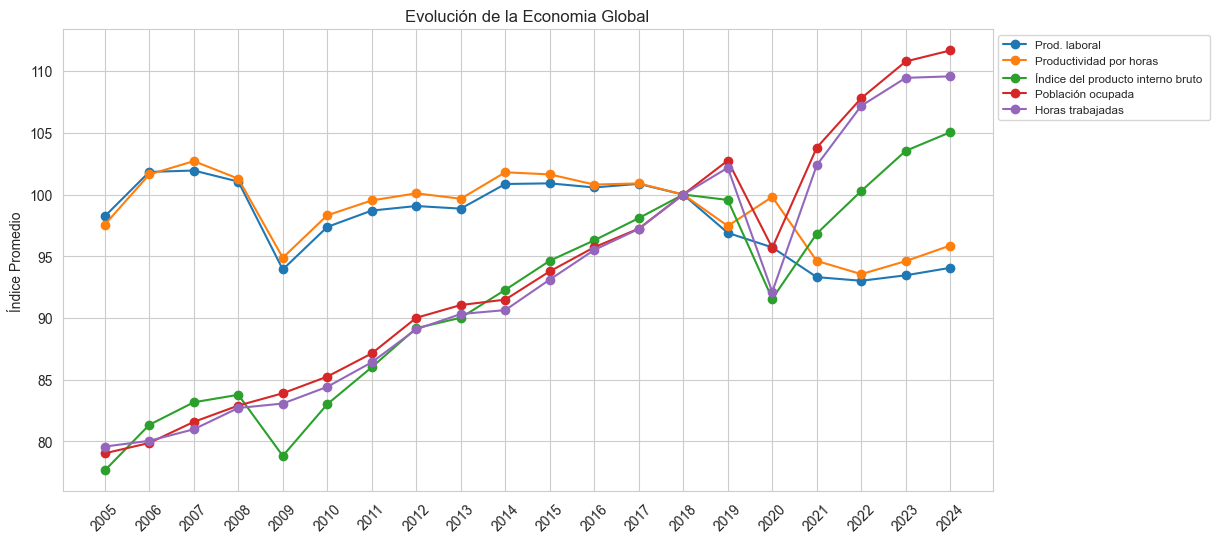

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
file_path = "IPL_01.xlsx"
df = pd.read_excel(file_path, sheet_name="Tabulado")

# Renombrar columnas asignando trimestre
columnas_nuevas = [df.columns[0], df.columns[1]]  # Mantener 'Variable' y 'Sector SCIAN'
año_actual = None
t_index = 1
for col in df.columns[2:]:
    if not str(col).startswith("Unnamed"):  # Nueva detección de año
        año_actual = int(col)
        t_index = 1
    columnas_nuevas.append(f"{año_actual}_t{t_index}")
    t_index += 1

df.columns = columnas_nuevas

# Crear nuevo DataFrame con promedios anuales
resultados = pd.DataFrame()
nombres_personalizados = {
    "Índice global de productividad laboral de la economía con base en la población ocupada total ": "Prod. laboral",
    "Índice global de productividad laboral de la economía con base en las horas trabajadas totales": "Productividad por horas",
    "Índice del producto interno bruto": "PIB",
    "Índice de la población ocupada total ": "Población ocupada",
    "Índice de horas trabajadas totales": "Horas trabajadas"
}

# Aplicar los nombres personalizados
resultados['Variable'] = df['Variable'].replace(nombres_personalizados)

años = sorted(set(int(c.split('_')[0]) for c in df.columns[2:]))
for año in años:
    columnas_trimestrales = [col for col in df.columns if col.startswith(str(año))]
    resultados[str(año)] = df[columnas_trimestrales].mean(axis=1)

# Filtrar valores válidos para graficar
resultados_v1 = resultados.dropna()

# Graficar
plt.figure(figsize=(12, 6))
for i, row in resultados_v1.iterrows():
    label = row['Variable']  # Usar nombres personalizados ya aplicados en el DataFrame
    plt.plot(años, row[1:], marker='o', label=label)


plt.ylabel("Índice Promedio")
plt.title("Evolución de la Economia Global")
plt.xticks(años, rotation=45)  # Mostrar todos los años en el eje x
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.grid()
plt.grid()
plt.show()


Matriz de correlación entre variables:
Variable                            Prod. laboral  Productividad por horas  \
Variable                                                                     
Prod. laboral                            1.000000                 0.952256   
Productividad por horas                  0.952256                 1.000000   
Índice del producto interno bruto       -0.353937                -0.316942   
Población ocupada                       -0.601896                -0.556642   
Horas trabajadas                        -0.574664                -0.553134   

Variable                            Índice del producto interno bruto   \
Variable                                                                 
Prod. laboral                                                -0.353937   
Productividad por horas                                      -0.316942   
Índice del producto interno bruto                             1.000000   
Población ocupada                          

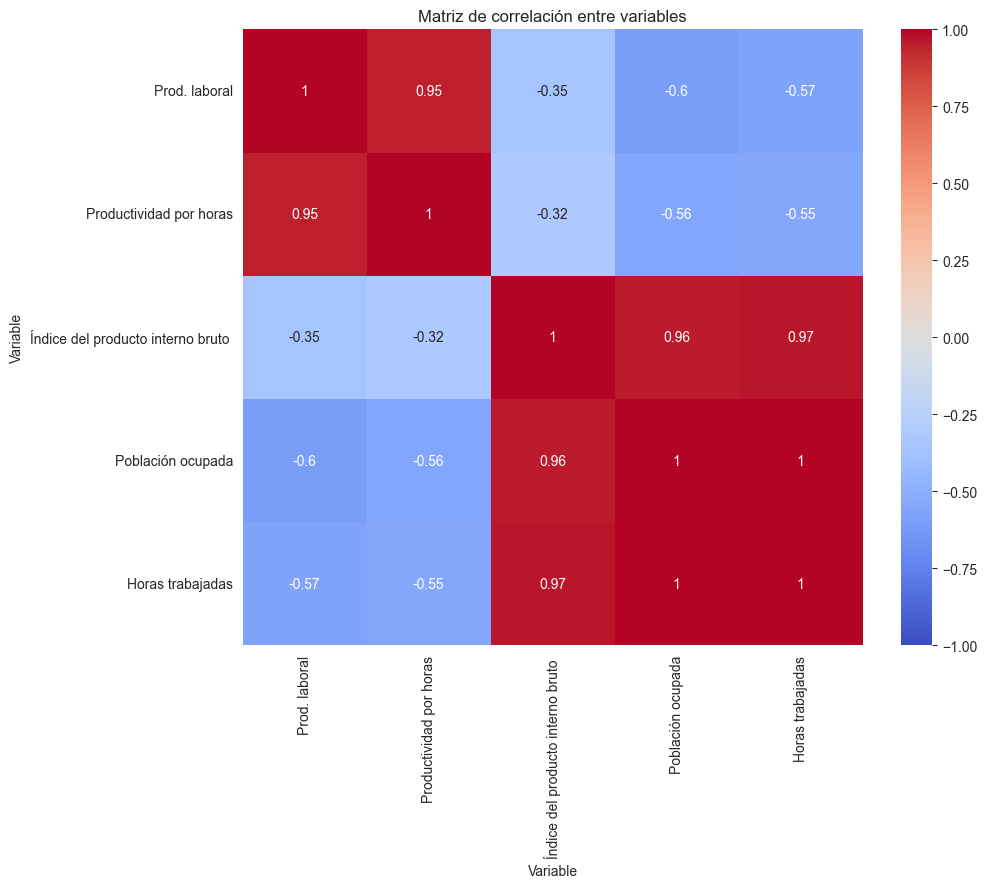

In [143]:
# Eliminar filas donde 'Variable' es NaN
resultados = resultados.dropna(subset=['Variable'])

# Calcular correlaciones (excluyendo la columna 'Variable')
correlaciones = resultados.drop('Variable', axis=1).transpose().corr()

# Asignar nombres de variables a la matriz de correlación
correlaciones.index = resultados['Variable']
correlaciones.columns = resultados['Variable']

# Mostrar la matriz de correlación
print("\nMatriz de correlación entre variables:")
print(correlaciones)

# Visualización con heatmap
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Matriz de correlación entre variables')
plt.show()

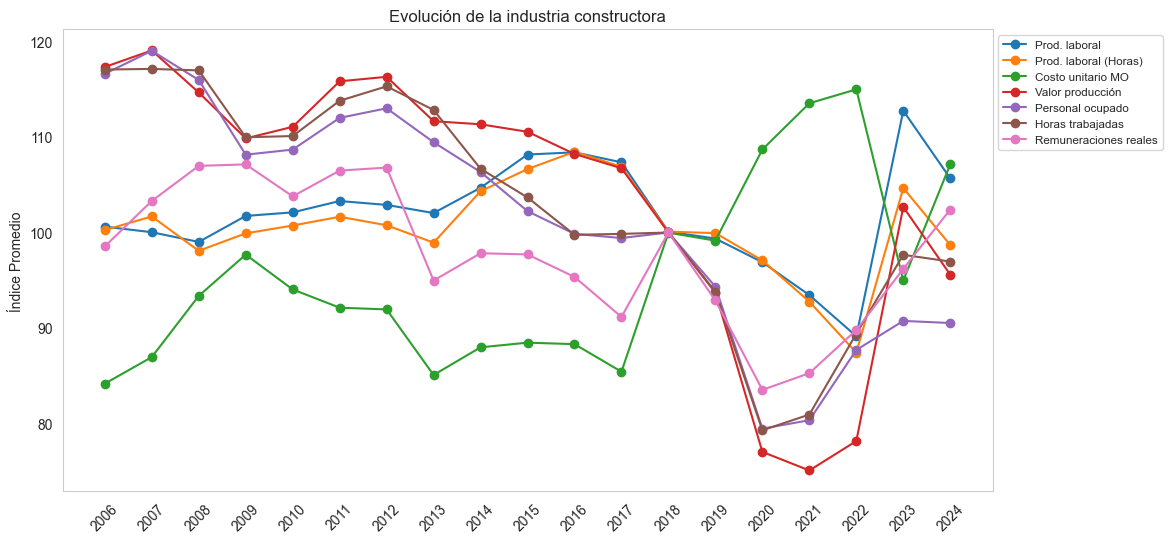

In [147]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo
file_path = "IPL_02.xlsx"
df = pd.read_excel(file_path, sheet_name="Tabulado")

# Renombrar columnas asignando trimestre
columnas_nuevas = [df.columns[0], df.columns[1]]  # Mantener 'Variable' y 'Sector SCIAN'
año_actual = None
t_index = 1
for col in df.columns[2:]:
    if not str(col).startswith("Unnamed"):  # Nueva detección de año
        año_actual = int(col)
        t_index = 1
    columnas_nuevas.append(f"{año_actual}_t{t_index}")
    t_index += 1

df.columns = columnas_nuevas

# Definir los índices a graficar y sus nombres personalizados
indices_seleccionados = {
    "Índice de productividad laboral con base en el personal ocupado total (Índice Base 2018 = 100)": "Prod. laboral",
    "Índice de productividad laboral con base en las horas trabajadas totales (Índice Base 2018 = 100)": "Prod. laboral (Horas)",
    "Índice del costo unitario de la mano de obra con base en el personal ocupado total (Índice Base 2018 = 100)": "Costo unitario MO",
    "Índice de valor de la producción (Índice Base 2018 = 100)": "Valor producción",
    "Índice de personal ocupado total (Índice Base 2018 = 100)": "Personal ocupado",
    "Índice de horas trabajadas totales (Índice Base 2018 = 100)": "Horas trabajadas",
    "Índice de remuneraciones reales (Índice Base 2018 = 100)": "Remuneraciones reales"
}

df_filtrado = df[df['Variable'].isin(indices_seleccionados.keys())].copy()
# Reemplazar valores no numéricos por NaN
df_filtrado = df_filtrado.replace("NDNDNDND", pd.NA)  # Agrega más valores si aparecen otros

# Convertir las columnas trimestrales a tipo numérico, forzando los errores a NaN
for col in df_filtrado.columns[2:]:
    df_filtrado[col] = pd.to_numeric(df_filtrado[col], errors="coerce")

# Eliminar columnas que contienen valores NaN
df_filtrado = df_filtrado.dropna(axis=1)

# Obtener los años válidos después de eliminar columnas
años_validos = [col.split('_')[0] for col in df_filtrado.columns[2:]]
años_validos = sorted(set(años_validos))

# Calcular los promedios anuales solo con las columnas restantes
df_resultados = pd.DataFrame()
df_resultados['Variable'] = df_filtrado['Variable'].replace(indices_seleccionados)
for año in años_validos:
    columnas_trimestrales = [col for col in df_filtrado.columns if col.startswith(str(año))]
    df_resultados[str(año)] = df_filtrado[columnas_trimestrales].mean(axis=1)


# Eliminar años con al menos un dato nulo
df_resultados_v2 = df_resultados.dropna(axis=1)

años_validos = [int(col) for col in df_resultados_v2.columns if col != 'Variable']

# Graficar
plt.figure(figsize=(12, 6))
for i, row in df_resultados_v2.iterrows():
    plt.plot(años_validos, row[1:], marker='o', label=row['Variable'])

plt.ylabel("Índice Promedio")
plt.title("Evolución de la industria constructora")
plt.xticks(años_validos, rotation=45)
plt.legend(loc='best', fontsize='small', bbox_to_anchor=(1, 1))
plt.grid()
plt.show()


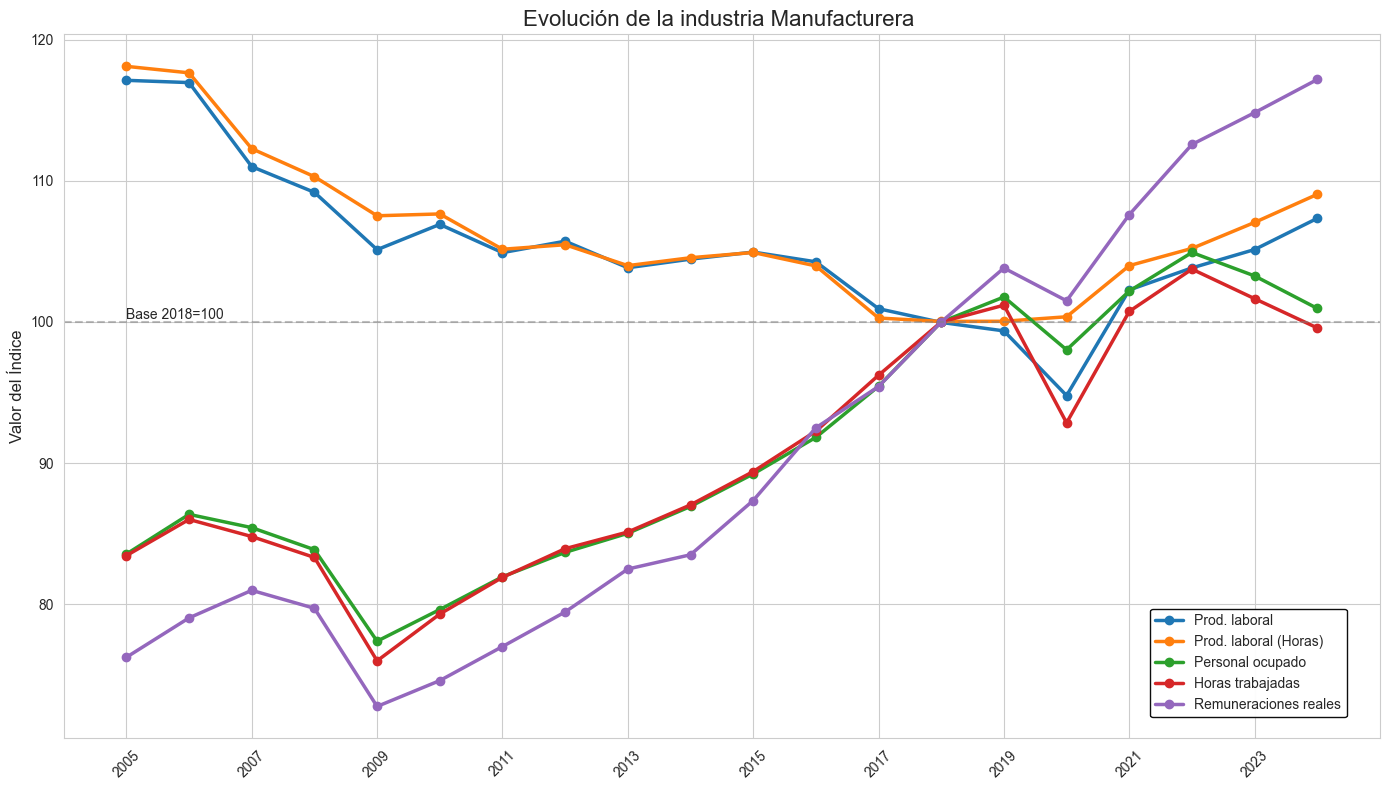

<Figure size 640x480 with 0 Axes>

In [122]:
import pandas as pd

# Cargar los datos
df = pd.read_excel('IPL_03.xlsx', sheet_name='Tabulado')

# Procesamiento inicial de columnas
columnas_nuevas = [df.columns[0], df.columns[1]]  # Mantener 'Variable' y 'Sector SCIAN'
año_actual = None
t_index = 1

for col in df.columns[2:]:
    if not str(col).startswith("Unnamed"):  # Nueva detección de año
        año_actual = int(col)
        t_index = 1
    columnas_nuevas.append(f"{año_actual}_t{t_index}")
    t_index += 1

df.columns = columnas_nuevas

# Diccionario de índices seleccionados con nombres nuevos
indices_seleccionados = {
    "-Índice de productividad laboral con base en el personal ocupado total (Índice Base 2018 = 100)": "Prod. laboral",
    "-Índice de productividad laboral con base en las horas trabajadas totales (Índice Base 2018 = 100)": "Prod. laboral (Horas)",
    "-Índice del costo unitario de la mano de obra con base en el personal ocupado total (Índice Base 2018 = 100)": "Costo unitario MO",
    "-Índice de valor de la producción (Índice Base 2018 = 100)": "Valor producción",
    "-Índice de personal ocupado total (Índice Base 2018 = 100)": "Personal ocupado",
    "-Índice de horas trabajadas totales (Índice Base 2018 = 100)": "Horas trabajadas",
    "-Índice de remuneraciones reales (Índice Base 2018 = 100)": "Remuneraciones reales"
}

# Filtrar solo las filas con los índices seleccionados
df_filtrado = df[df['Variable'].isin(indices_seleccionados.keys())]

# Eliminar columna 'Sector SCIAN'
df_filtrado = df_filtrado.drop(columns=['Sector SCIAN'])

# Identificar años únicos
años = []
for col in df_filtrado.columns:
    if '_t' in col:
        año = col.split('_')[0]
        if año not in años:
            años.append(año)
años = sorted(años)

# Función para calcular promedios anuales por variable
def calcular_promedios_anuales(df, años):
    resultados = []
    
    for variable_original, nombre_nuevo in indices_seleccionados.items():
        # Filtrar datos para la variable actual
        df_variable = df[df['Variable'] == variable_original]
        
        if not df_variable.empty:
            fila_resultado = {'Variable': nombre_nuevo}
            
            for año in años:
                # Seleccionar columnas trimestrales para este año
                cols_trimestres = [col for col in df_variable.columns if col.startswith(f"{año}_")]
                
                if cols_trimestres:
                    # Calcular promedio de todos los sectores para cada trimestre
                    promedios_trimestrales = df_variable[cols_trimestres].mean(axis=0)
                    # Calcular promedio anual de los promedios trimestrales
                    promedio_anual = promedios_trimestrales.mean()
                    fila_resultado[año] = round(promedio_anual, 2)
            
            resultados.append(fila_resultado)
    
    return pd.DataFrame(resultados)

# Calcular promedios anuales para todas las variables
df_resultado = calcular_promedios_anuales(df_filtrado, años)

# Reordenar columnas: Variable + años en orden
columnas_ordenadas = ['Variable'] + años
df_resultado_v3 = df_resultado[columnas_ordenadas]
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.title('Evolución de la industria Manufacturera ', fontsize=16)
plt.ylabel('Valor del Índice', fontsize=12)

# Graficar cada variable
for index, row in df_resultado_v3.iterrows():
    variable = row['Variable']
    valores = row.drop('Variable').astype(float)
    años = valores.index.astype(int)
    plt.plot(años, valores, marker='o', label=variable, linewidth=2.5)

# Añadir línea de referencia (2018 = 100)
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.text(2005, 100, 'Base 2018=100', verticalalignment='bottom', horizontalalignment='left')

# Mejorar el eje x
plt.xticks(range(2005, 2025, 2), rotation=45)
plt.xlim(2004, 2025)

# Añadir leyenda y ajustar layout
plt.legend(loc='lower right',
           frameon=True,
           framealpha=0.95,
           edgecolor='black',
           fontsize=10,
           bbox_to_anchor=(0.98, 0.02))
plt.tight_layout()

# Mostrar el gráfico
plt.show()

# Opcional: Guardar el gráfico
plt.savefig('evolucion_indicadores.png', dpi=300, bbox_inches='tight')

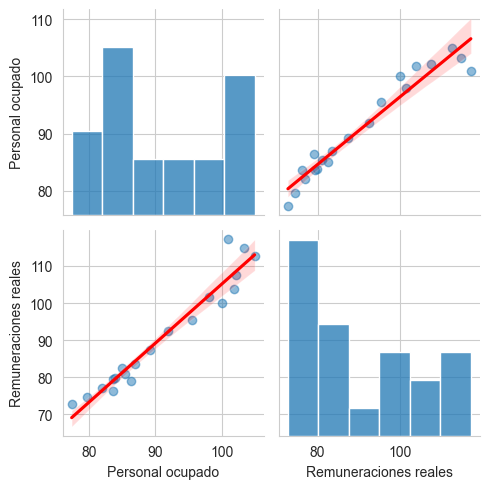

In [130]:
# Seleccionar solo algunas variables clave para mejor visualización
variables_clave = ['Prod. laboral (Ocupados)', 'Valor producción', 'Personal ocupado', 'Remuneraciones reales']
df_pairplot = df_resultado_v3[df_resultado_v3['Variable'].isin(variables_clave)].set_index('Variable').T

# Crear pair plot
sns.pairplot(df_pairplot, 
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.tight_layout()
plt.show()

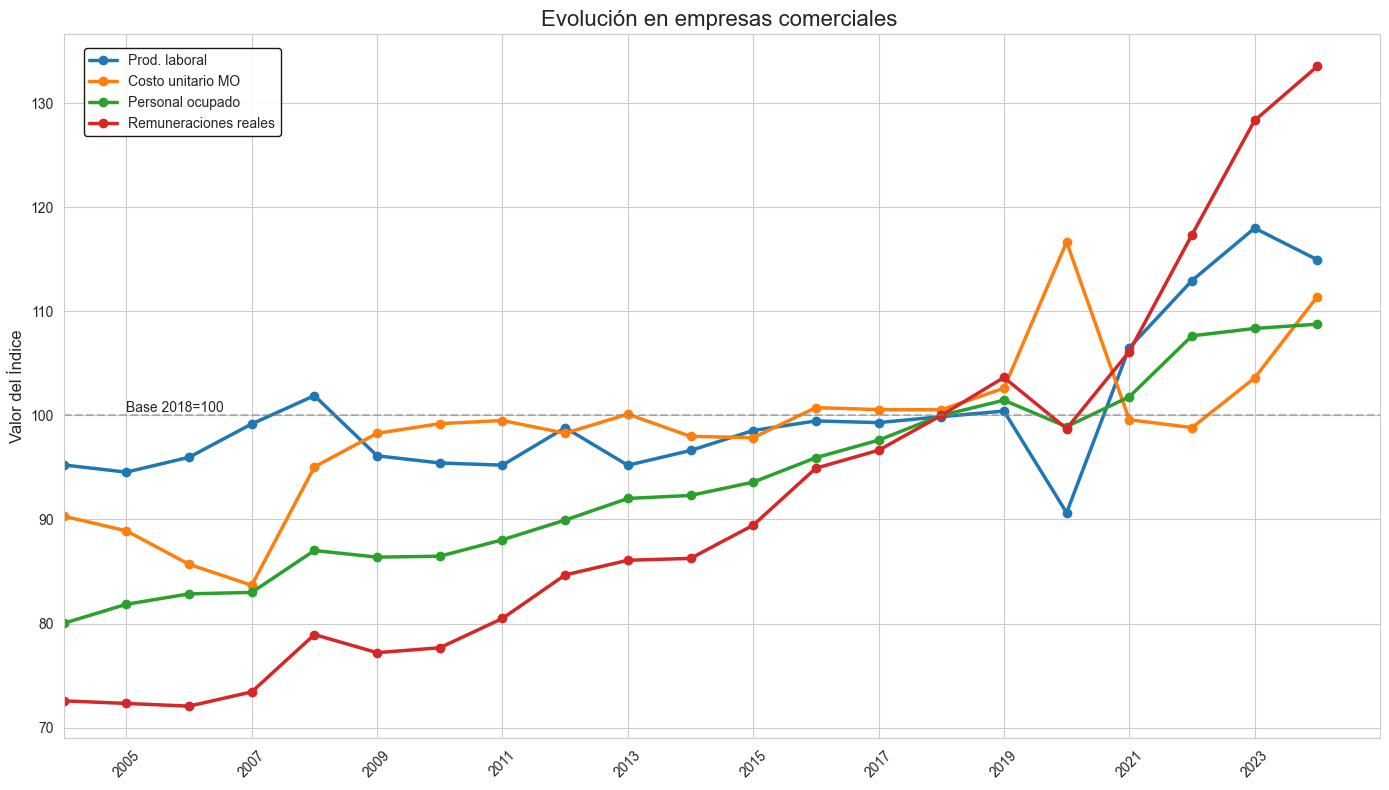

In [123]:
import pandas as pd

# Cargar los datos
df = pd.read_excel('IPL_05.xlsx', sheet_name='Tabulado')

# Procesamiento inicial de columnas
columnas_nuevas = [df.columns[0], df.columns[1]]  # Mantener 'Variable' y 'Sector SCIAN'
año_actual = None
t_index = 1

for col in df.columns[2:]:
    if not str(col).startswith("Unnamed"):  # Nueva detección de año
        año_actual = int(col)
        t_index = 1
    columnas_nuevas.append(f"{año_actual}_t{t_index}")
    t_index += 1

df.columns = columnas_nuevas

# Diccionario de índices seleccionados con nombres nuevos
indices_seleccionados = {
    "Índice de productividad laboral con base en el personal ocupado total (Índice Base 2018 = 100)": "Prod. laboral",
    "Índice de productividad laboral con base en las horas trabajadas totales (Índice Base 2018 = 100)": "Prod. laboral (Horas)",
    "Índice del costo unitario de la mano de obra con base en el personal ocupado total (Índice Base 2018 = 100)": "Costo unitario MO",
    "Índice de valor de la producción (Índice Base 2018 = 100)": "Valor producción",
    "Índice de personal ocupado total (Índice Base 2018 = 100)": "Personal ocupado",
    "Índice de horas trabajadas totales (Índice Base 2018 = 100)": "Horas trabajadas",
    "Índice de remuneraciones reales (Índice Base 2018 = 100)": "Remuneraciones reales"
}

# Filtrar solo las filas con los índices seleccionados
df_filtrado = df[df['Variable'].isin(indices_seleccionados.keys())]

# Eliminar columna 'Sector SCIAN'
df_filtrado = df_filtrado.drop(columns=['Sector SCIAN'])

# Identificar años únicos
años = []
for col in df_filtrado.columns:
    if '_t' in col:
        año = col.split('_')[0]
        if año not in años:
            años.append(año)
años = sorted(años)

# Función para calcular promedios anuales por variable
def calcular_promedios_anuales(df, años):
    resultados = []
    
    for variable_original, nombre_nuevo in indices_seleccionados.items():
        # Filtrar datos para la variable actual
        df_variable = df[df['Variable'] == variable_original]
        
        if not df_variable.empty:
            fila_resultado = {'Variable': nombre_nuevo}
            
            for año in años:
                # Seleccionar columnas trimestrales para este año
                cols_trimestres = [col for col in df_variable.columns if col.startswith(f"{año}_")]
                
                if cols_trimestres:
                    # Calcular promedio de todos los sectores para cada trimestre
                    promedios_trimestrales = df_variable[cols_trimestres].mean(axis=0)
                    # Calcular promedio anual de los promedios trimestrales
                    promedio_anual = promedios_trimestrales.mean()
                    fila_resultado[año] = round(promedio_anual, 2)
            
            resultados.append(fila_resultado)
    
    return pd.DataFrame(resultados)

# Calcular promedios anuales para todas las variables
df_resultado = calcular_promedios_anuales(df_filtrado, años)

# Reordenar columnas: Variable + años en orden
columnas_ordenadas = ['Variable'] + años
df_resultado_v5 = df_resultado[columnas_ordenadas]
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos
plt.figure(figsize=(14, 8))
sns.set_style("whitegrid")
plt.title('Evolución en empresas comerciales ', fontsize=16)
plt.ylabel('Valor del Índice', fontsize=12)

# Graficar cada variable
for index, row in df_resultado_v5.iterrows():
    variable = row['Variable']
    valores = row.drop('Variable').astype(float)
    años = valores.index.astype(int)
    plt.plot(años, valores, marker='o', label=variable, linewidth=2.5)

# Añadir línea de referencia (2018 = 100)
plt.axhline(y=100, color='gray', linestyle='--', alpha=0.5)
plt.text(2005, 100, 'Base 2018=100', verticalalignment='bottom', horizontalalignment='left')

# Mejorar el eje x
plt.xticks(range(2005, 2025, 2), rotation=45)
plt.xlim(2004, 2025)

# Añadir leyenda y ajustar layout
plt.legend(loc='upper left', 
           bbox_to_anchor=(0.01, 0.99),
           frameon=True,
           framealpha=0.9,
           edgecolor='black')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

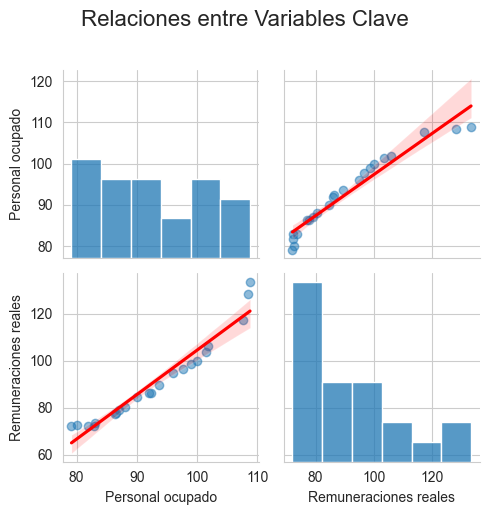

In [133]:
# Seleccionar solo algunas variables clave para mejor visualización
variables_clave = ['Prod. laboral (Ocupados)', 'Valor producción', 'Personal ocupado', 'Remuneraciones reales']
df_pairplot = df_resultado_v5[df_resultado_v5['Variable'].isin(variables_clave)].set_index('Variable').T

# Crear pair plot
sns.pairplot(df_pairplot, 
             kind='reg',
             plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'alpha': 0.5}})
plt.suptitle('Relaciones entre Variables Clave', y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_19808\506780052.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Variable'] = df_filtrado['Variable'].map(indices_seleccionados)
C:\Users\ENRIQUE\AppData\Local\Temp\ipykernel_19808\506780052.py:35: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filtrado = df_filtrado.replace('ND', np.nan)


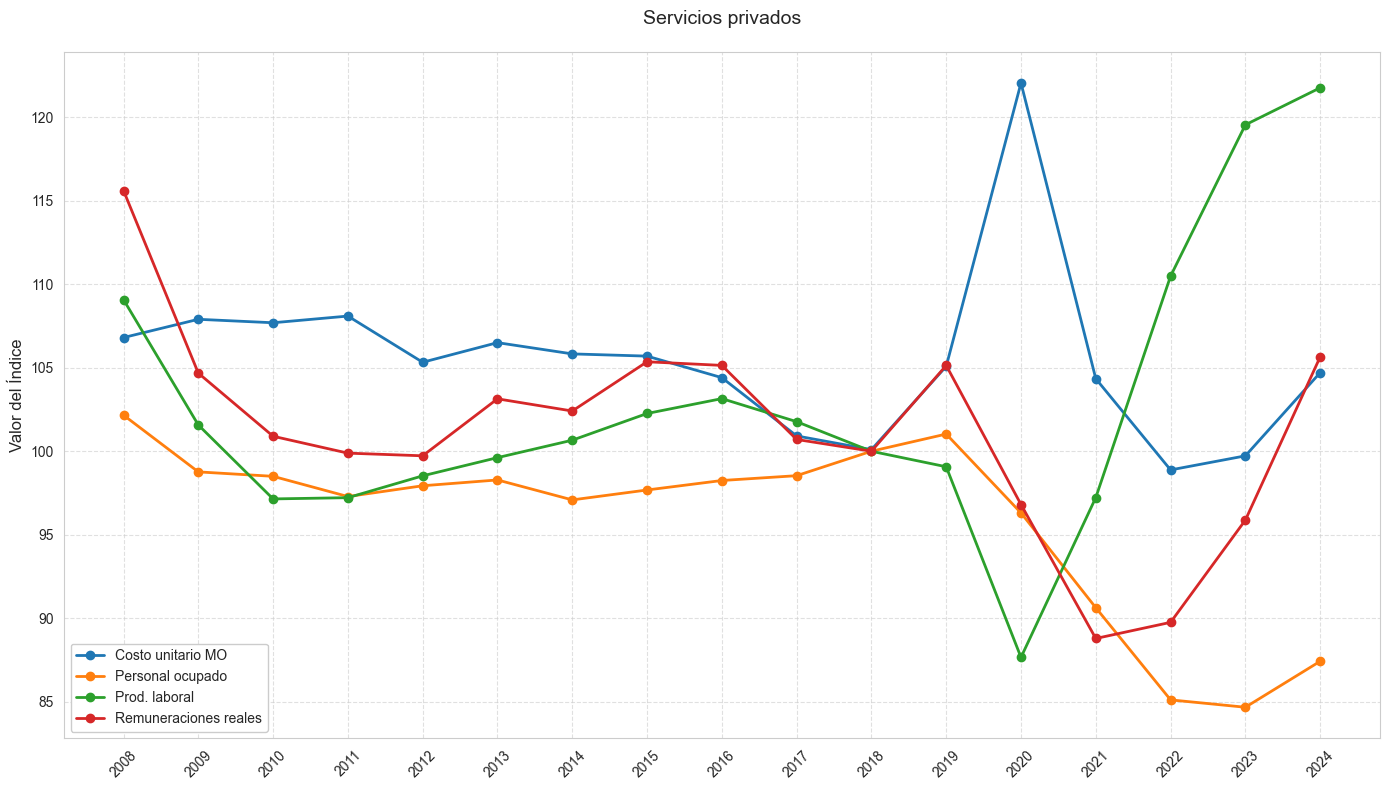

In [149]:
# Cargar los datos
df = pd.read_excel('IPL_07.xlsx', sheet_name='Tabulado')

# Procesar columnas como antes
columnas_nuevas = [df.columns[0], df.columns[1]]  # Mantener 'Variable' y 'Sector SCIAN'
año_actual = None
t_index = 1
for col in df.columns[2:]:
    if not str(col).startswith("Unnamed"):  # Nueva detección de año
        año_actual = int(col)
        t_index = 1
    columnas_nuevas.append(f"{año_actual}_t{t_index}")
    t_index += 1

df.columns = columnas_nuevas

# Definir los índices seleccionados
indices_seleccionados = {
    "Índice de productividad laboral con base en el personal ocupado total (Índice Base 2018 = 100)": "Prod. laboral",
    "Índice de productividad laboral con base en las horas trabajadas totales (Índice Base 2018 = 100)": "Prod. laboral (Horas)",
    "Índice del costo unitario de la mano de obra con base en el personal ocupado total (Índice Base 2018 = 100)": "Costo unitario MO",
    "Índice de valor de la producción (Índice Base 2018 = 100)": "Valor producción",
    "Índice de personal ocupado total (Índice Base 2018 = 100)": "Personal ocupado",
    "Índice de horas trabajadas totales (Índice Base 2018 = 100)": "Horas trabajadas",
    "Índice de remuneraciones reales (Índice Base 2018 = 100)": "Remuneraciones reales"
}

# Filtrar solo las filas con los índices seleccionados
df_filtrado = df[df['Variable'].isin(indices_seleccionados.keys())]

# Reemplazar nombres de variables con los nombres cortos
df_filtrado['Variable'] = df_filtrado['Variable'].map(indices_seleccionados)

# Reemplazar 'ND' con NaN
df_filtrado = df_filtrado.replace('ND', np.nan)

# Obtener lista de años únicos (basado en las columnas que tienen _t)
columnas_trimestres = [col for col in df_filtrado.columns if '_t' in col]
años = list(set([col.split('_')[0] for col in columnas_trimestres]))

# Calcular el promedio por año para cada fila, ignorando NaN
for año in sorted(años):
    columnas_año = [col for col in df_filtrado.columns if col.startswith(f"{año}_")]
    df_filtrado[año] = df_filtrado[columnas_año].mean(axis=1, skipna=True)

# Eliminar columnas de trimestres y Sector SCIAN
columnas_años_promediados = sorted(años)
df_final = df_filtrado[['Variable'] + columnas_años_promediados]

# Agrupar por Variable y calcular el promedio para cada año
df_final_v4 = df_final.groupby('Variable').mean().reset_index()
# Configurar el gráfico
plt.figure(figsize=(14, 8))

# Paleta de colores
colors = plt.cm.tab10.colors

# Graficar todas las variables
for i, variable in enumerate(df_final_v4['Variable']):
    data = df_final_v4[df_final_v4['Variable'] == variable].iloc[:, 1:].T
    plt.plot(data.index, data.values, 
             marker='o', 
             linewidth=2,
             color=colors[i % len(colors)],
             label=variable)

plt.title('Servicios privados', pad=20, fontsize=14)
plt.ylabel('Valor del Índice', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Leyenda en esquina inferior izquierda
plt.legend(loc='lower left', framealpha=1, fontsize=10)

# Rotar etiquetas
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


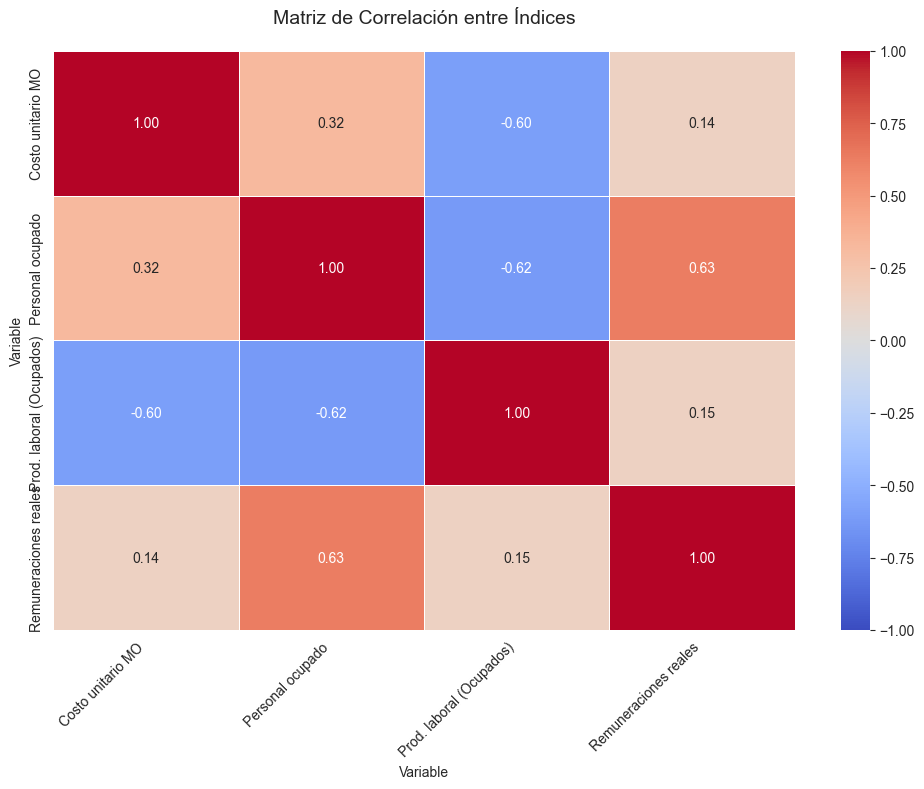

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Preparar los datos (transponer para tener variables como columnas)
df_corr = df_final_v4.set_index('Variable').T

# 2. Calcular la matriz de correlación
corr_matrix = df_corr.corr()

# 3. Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True, 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            fmt=".2f",
            linewidths=0.5,
            annot_kws={"size": 10})

plt.title('Matriz de Correlación', pad=20, fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

In [136]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Lista de tus dataframes (ajusta los nombres si es necesario)
dataframes = {
    'v4': df_final_v4,
    'v5': df_resultado_v5,
    'v3': df_resultado_v3,
    'v2': df_resultados_v2,
    'v1': resultados_v1
}

# Recopilar los valores de "Prod. laboral" en '2024'
valores = []
nombres = []

for name, df in dataframes.items():
    try:
        # Buscar fila donde 'variable' == 'Prod. laboral'
        mask = df['variable'] == 'Prod. laboral'
        valor = df.loc[mask, '2024'].values[0]  # Extraer valor de '2024'
        valores.append(valor)
        nombres.append(name)
    except (KeyError, IndexError, AttributeError):
        print(f"No se encontró 'Prod. laboral' en {name}")

# Si hay datos, graficar
if valores:
    # Cerrar el gráfico (repetir el primer valor al final)
    valores_cerrado = valores + valores[:1]
    angulos = np.linspace(0, 2 * np.pi, len(nombres), endpoint=False).tolist()
    angulos_cerrado = angulos + angulos[:1]

    # Configurar el gráfico
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw={'polar': True})
    ax.plot(angulos_cerrado, valores_cerrado, 'o-', linewidth=2, label='Prod. laboral (2024)')
    ax.fill(angulos_cerrado, valores_cerrado, alpha=0.25)
    
    # Añadir etiquetas
    ax.set_thetagrids(np.degrees(angulos), labels=nombres)
    ax.set_title('Comparación de Productividad Laboral (2024)', pad=20)
    ax.legend(loc='upper right')
    ax.grid(True)
    
    plt.show()
else:
    print("No se encontró 'Prod. laboral' en ningún dataframe.")

No se encontró 'Prod. laboral' en v4
No se encontró 'Prod. laboral' en v5
No se encontró 'Prod. laboral' en v3
No se encontró 'Prod. laboral' en v2
No se encontró 'Prod. laboral' en v1
No se encontró 'Prod. laboral' en ningún dataframe.


In [138]:
df_final_v4.head()

,Variable,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Costo unitario MO,106.807088,107.901303,107.694375,108.094337,105.328247,106.503335,105.828904,105.696147,104.406247,100.916116,100.095445,105.083755,122.053988,104.343430,98.879834,99.723073,104.706294
1,Personal ocupado,102.160626,98.762739,98.497206,97.286210,97.931561,98.279637,97.084601,97.678473,98.246312,98.535345,100.000000,101.028317,96.305898,90.627986,85.107942,84.666543,87.419676
2,Prod. laboral,109.079266,101.572790,97.143376,97.217881,98.525769,99.615675,100.660321,102.259509,103.150532,101.770307,99.997103,99.069379,87.654463,97.224963,110.487622,119.549009,121.766726
3,Remuneraciones reales,115.612039,104.678565,100.897015,99.884941,99.726034,103.138189,102.408293,105.357461,105.140657,100.704174,100.000000,105.138020,96.807321,88.784922,89.751312,95.875308,105.647812


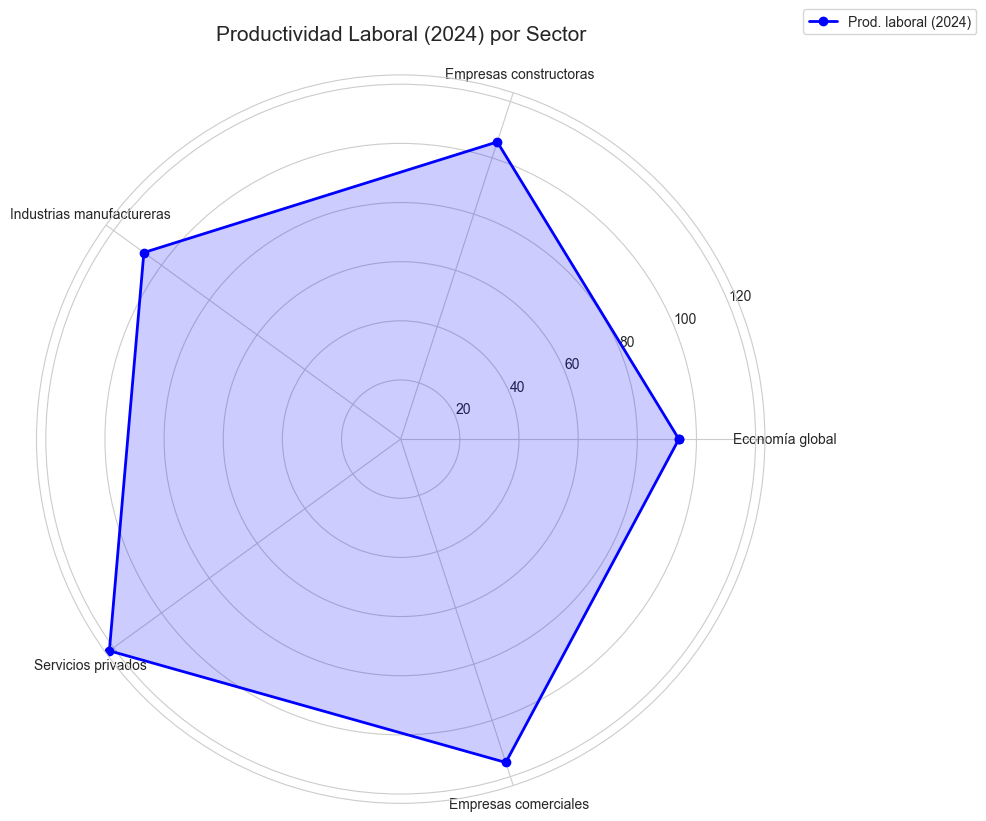

In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# DataFrames y nombres personalizados
dataframes = {
    'v1': resultados_v1,  # Economía global
    'v2': df_resultados_v2,  # Empresas constructoras
    'v3': df_resultado_v3,  # Industrias manufactureras
    'v4': df_final_v4,  # Servicios privados
    'v5': df_resultado_v5  # Empresas comerciales
}

# Mapeo de nombres personalizados
nombres_personalizados = {
    'v1': 'Economía global',
    'v2': 'Empresas constructoras',
    'v3': 'Industrias manufactureras',
    'v4': 'Servicios privados',
    'v5': 'Empresas comerciales'
}

# Recopilar valores de "Prod. laboral" en '2024'
valores = []
nombres = []

for name, df in dataframes.items():
    try:
        prod_laboral = df[df['Variable'] == 'Prod. laboral']
        if not prod_laboral.empty:
            valor = prod_laboral['2024'].values[0]
            valores.append(valor)
            nombres.append(nombres_personalizados[name])  # Usar nombre personalizado
        else:
            print(f"No se encontró 'Prod. laboral' en {name}")
    except KeyError as e:
        print(f"Error en {name}: {e}")

# Graficar si hay datos
if valores:
    # Cerrar el círculo (último punto = primer punto)
    valores_cerrado = valores + valores[:1]
    angulos = np.linspace(0, 2 * np.pi, len(nombres), endpoint=False)
    angulos_cerrado = np.concatenate((angulos, [angulos[0]]))
    
    # Configurar gráfico
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})
    ax.plot(angulos_cerrado, valores_cerrado, 'o-', linewidth=2, color='blue', label='Prod. laboral (2024)')
    ax.fill(angulos_cerrado, valores_cerrado, alpha=0.2, color='blue')
    
    # Añadir etiquetas y título
    ax.set_thetagrids(angulos * 180/np.pi, labels=nombres)
    ax.set_title('Productividad Laboral (2024) por Sector', pad=25, fontsize=15)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron datos para graficar.")

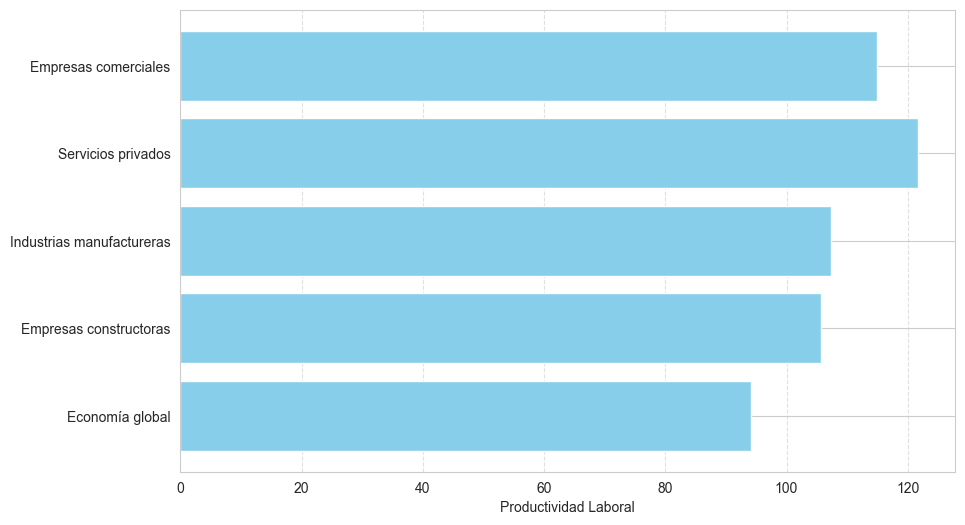

In [152]:
plt.figure(figsize=(10, 6))
plt.barh(nombres, valores, color='skyblue')
plt.xlabel('Productividad Laboral')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()